In [10]:
import pickle
import os
from matplotlib import pyplot as plt

In [5]:
data_path = 'local/runs/example_data/data/'
data_legend_path = data_path + 'data_legend.p'
data_legend = pickle.load(open(data_legend_path, 'rb'))

In [19]:
depth_array.shape

(1, 144, 256)

point 0 at [x, y, z, yaw] = [1, 2, -3, 0.7853981633974483]


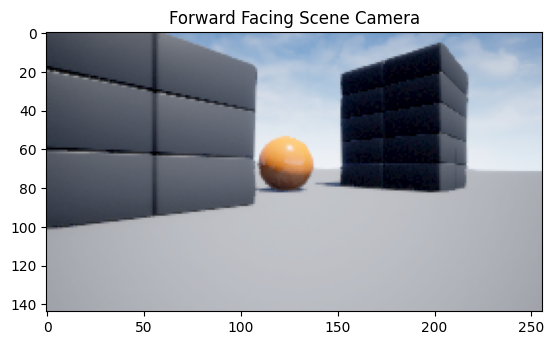

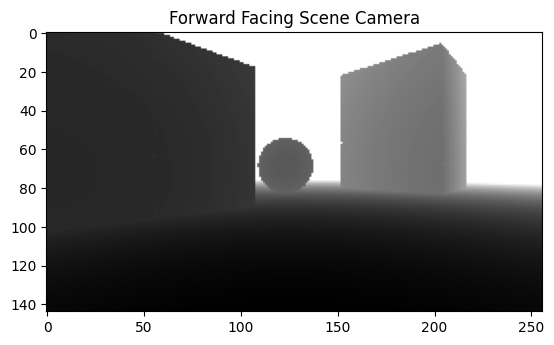

point 2 at [x, y, z, yaw] = [102, 24, -10, 3.141592653589793]


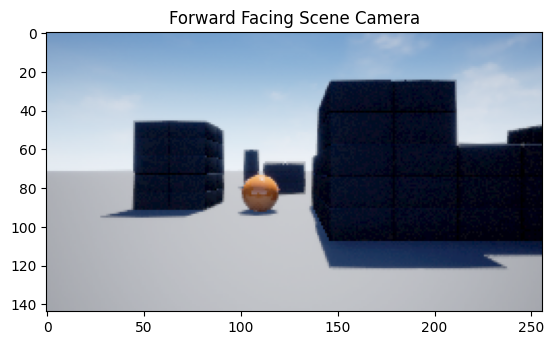

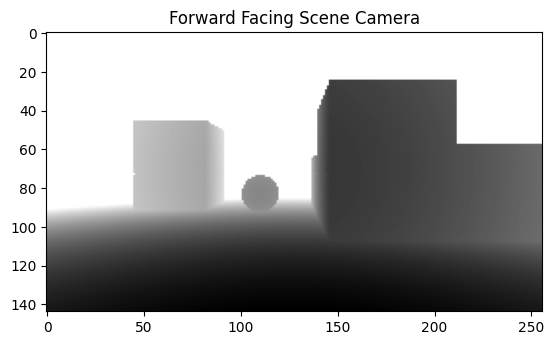

point 1 at [x, y, z, yaw] = [20, 5, -6, 4.71238898038469]


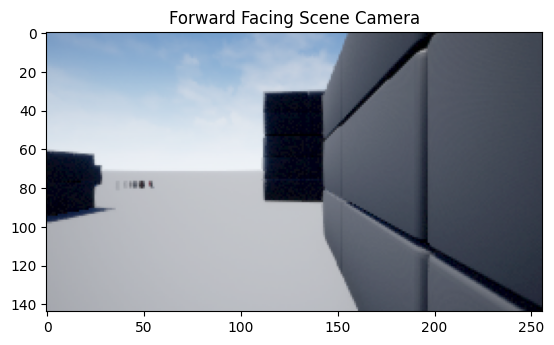

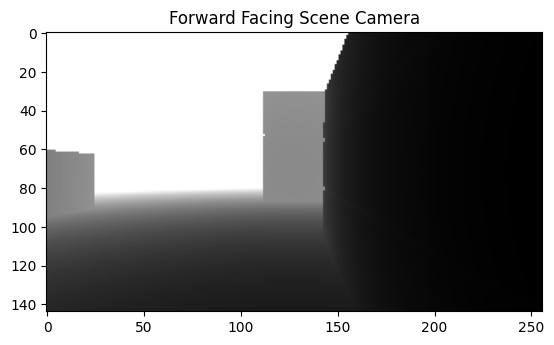

In [27]:
max_depth = 100 # [m] max distance to perceive, after this is horizon we dont care about
# to visualize a depth map, max_depth must be <= 255
for fname in os.listdir(data_path):
    fpath = data_path + fname
    if not os.path.isdir(fpath):
        continue
    fpath += '/'
    point_idx = int(fname)
    point_meta = data_legend[point_idx]

    print('point', point_idx, 'at', '[x, y, z, yaw]', '=', point_meta)

    # read and view forward facing RGB camera image
    rgb_file = 'ForwardCamera.png'
    rgb_image = plt.imread(fpath + rgb_file)
    plt.imshow(rgb_image)
    plt.title('Forward Facing Scene Camera')
    plt.show()

    # read and view forward facing depth array as grayscale image
    depth_file = 'ForwardDepth.p'
    depth_array = pickle.load(open(fpath + depth_file, 'rb'))
    depth_image = depth_array.copy()
    depth_image = depth_image[0]
    depth_image[depth_image > max_depth] = max_depth
    plt.imshow(depth_image, cmap='gray')
    plt.title('Forward Facing Scene Camera')
    plt.show()